In [0]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Imports

In [0]:
import json

In [0]:
import requests
import pandas as pd
import numpy as np

# Data

Resources at http://www3.septa.org/hackathon/

In [0]:
endpoint = 'http://www3.septa.org/hackathon/Stops/{}'

In [0]:
trolleys = [
    10,
    11,
    13,
    15,
    34,
    36,
    101,
    102
]

In [0]:
def get_all_stops(trolleys):
    for trolley in trolleys:
        resp = requests.get(endpoint.format(trolley))
        for stop in resp.json():
            stop['trolley'] = trolley
            yield stop

In [0]:
trolley_stops = pd.DataFrame(get_all_stops(trolleys))

In [0]:
trolley_stops.head()

,lat,lng,stopid,stopname,trolley
0,39.973059,-75.218615,277,Lancaster Av &amp; Girard Av,10
1,39.957929,-75.201901,279,40th St &amp; Filbert St,10
2,39.952532,-75.162559,283,13th St Trolley Station,10
3,39.955451,-75.194233,287,36th St Trolley Portal Station,10
4,39.972244,-75.217035,290,Lancaster Av &amp; 48th St,10


In [0]:
len(trolley_stops.stopid.unique()) == len(trolley_stops.stopid)

False

In [0]:
trolley_stops[trolley_stops.stopid.duplicated()].sort('stopid')

,lat,lng,stopid,stopname,trolley
78,39.952532,-75.162559,283,13th St Trolley Station,11
392,39.952532,-75.162559,283,13th St Trolley Station,34
174,39.952532,-75.162559,283,13th St Trolley Station,13
513,39.952532,-75.162559,283,13th St Trolley Station,36
393,39.949595,-75.203333,301,40th St Trolley Portal,34
175,39.949595,-75.203333,301,40th St Trolley Portal,13
514,39.949595,-75.203333,301,40th St Trolley Portal,36
515,39.940955,-75.212582,302,Woodland Av &amp; 49th St,36
394,39.928267,-75.230599,303,Woodland Av &amp; 62nd St,34
395,39.917304,-75.246245,304,Woodland Av &amp; Island Av,34


In [0]:
trolley_stops.to_excel('../data/trolley_stops.xls',index=False)

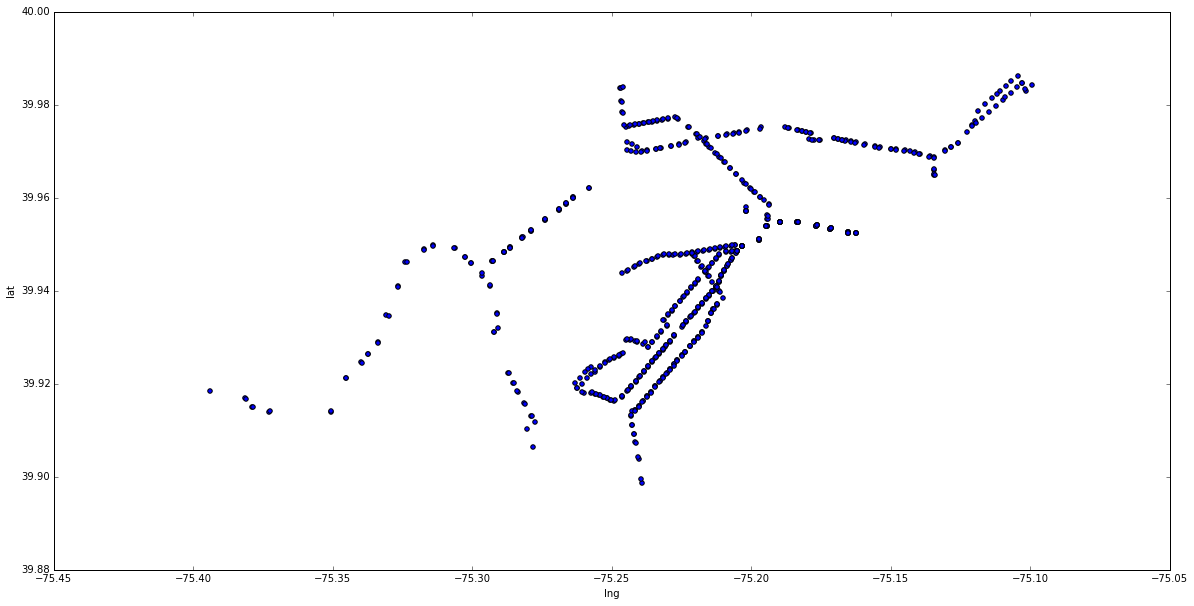

In [0]:
trolley_stops.plot(x='lng',y='lat',kind='scatter',figsize=(20,10))

In [0]:
trolley_stops[['lat','lng']].plot

<bound method DataFrame.plot_frame of            lat        lng
0    39.973059 -75.218615
1    39.957929 -75.201901
2    39.952532 -75.162559
3    39.955451 -75.194233
4    39.972244 -75.217035
5    39.975860 -75.240307
6    39.983697 -75.247009
7    39.980912 -75.246661
8    39.978350 -75.246184
9    39.975332 -75.244986
10   39.975499 -75.243651
11   39.975693 -75.241879
12   39.976054 -75.238653
13   39.976248 -75.236904
14   39.976406 -75.235403
15   39.976591 -75.233761
16   39.976811 -75.231858
17   39.977013 -75.229908
18   39.977295 -75.227380
19   39.976855 -75.226176
20   39.975207 -75.222590
21   39.973748 -75.219747
22   39.971555 -75.216115
23   39.970973 -75.215160
24   39.969667 -75.212991
25   39.968772 -75.211541
26   39.967725 -75.209878
27   39.966391 -75.207662
28   39.965093 -75.205564
29   39.963151 -75.202440
..         ...        ...
670  39.949495 -75.286430
671  39.948444 -75.288652
672  39.948257 -75.288723
673  39.949307 -75.286490
674  39.952824 -75.279066


In [0]:
import csv

In [0]:
dw = csv.DictWriter

In [0]:
trolley_stops.columns

Index(['lat', 'lng', 'stopid', 'stopname', 'trolley'], dtype='object')

# to csv

In [0]:
dw = csv.DictWriter(open('../data/trolley_stops.csv','w'), fieldnames=['lat', 'lng', 'stopid', 'stopname', 'trolley'])

In [0]:
dw.writeheader()
dw.writerows([s for s in get_all_stops(trolleys)])

In [0]:
!head '../data/trolley_stops.csv'

# to geojson

In [0]:
gjson = { "type": "FeatureCollection",
    "features": []}

for n, group in trolley_stops.groupby('stopid'):
    gj = {"type": "Feature",
          "geometry": {
            "type": "Point",
            "coordinates": [group.iloc[0]['lng'], group.iloc[0]['lat']]
          },
          "properties": {
            "name": group.iloc[0]['stopname'],
            "trolleys": ', '.join(list(set([str(n) for n in group['trolley']])))
          }}
    gjson['features'].append(gj)

In [0]:
print(json.dumps(gjson['features'][0], indent=2))

{
  "properties": {
    "name": "Lancaster Av &amp; Girard Av",
    "trolleys": "10"
  },
  "geometry": {
    "coordinates": [
      -75.218615,
      39.973059
    ],
    "type": "Point"
  },
  "type": "Feature"
}


In [0]:
with open('../data/trolley_stops.geojson','w') as fout:
    json.dump(gjson,fout, indent=2)

In [0]:
!head -n15 ../data/trolley_stops.geojson

{
  "features": [
    {
      "properties": {
        "name": "Lancaster Av &amp; Girard Av",
        "trolleys": "10"
      },
      "geometry": {
        "coordinates": [
          -75.218615,
          39.973059
        ],
        "type": "Point"
      },
      "type": "Feature"
